# Comparando arquiteturas

### Modelo 1:
- Fully connected 128 activation relu
- Fully connected 10 activation softmax

### Modelo 2:
- Convolution2D filter 3x3 activation relu
- MaxPooling2D filter 3x3 
- Dropout 0.2
- Flatten
- Fully connected 128 activation relu
- Fully connected 10 activation softmax

### Modelo 3:
- Convolution2D filter 5x5 activation relu
- MaxPooling2D filter 4x4
- Dropout 0.2
- Flatten
- Fully connected 128 activation relu
- Fully connected 10 activation softmax

# TODO:  Modelo 4: MobileNet (com freeze em todas as camadas)

# TODO:  Modelo 5: VGG16 (com freeze em todas as camadas)


# TODO: criar modelos MobileNet e VGG16 com algumas camadas descongeladas

In [1]:
# seed para Pyhton 
import random as rn
rn.seed(1254)

# seed para Tensorflow
import tensorflow as tf
tf.set_random_seed(89)

/home/camilalm/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Using TensorFlow backend.


Samples shape: (2062, 64, 64)
Labels shape: (2062, 10)

Training shape: (1752, 64, 64)
1752 sample, 64 x 64 size grayscale image.



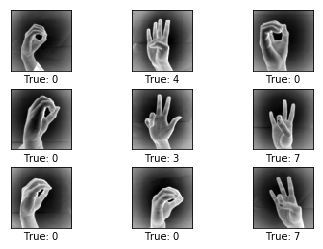

Test shape: (310, 64, 64)
310 sample, 64 x 64 size grayscale image.



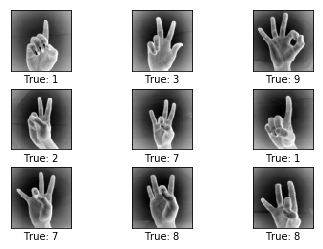

In [2]:
# Configura conjuntos de treinamento e teste 
# X_train, X_test, Y_train, Y_test
%run './functions/SLD-LoadTrainTestSets.ipynb'

In [3]:
import keras
from keras import backend as K
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.models import Sequential, Model, Input
from keras.applications.mobilenet import MobileNet
from keras.layers import Conv2D, GlobalAveragePooling2D, Reshape, MaxPooling2D
from keras.optimizers import Adam

In [4]:
input_shape = (64,64)
adam_lr = 0.0001
nb_epochs = 10
cm_plot_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
validation_split = 0.1
batch_size=10
resultados = []

## Modelo 1 
- Fully connected 128 activation relu
- Fully connected 10 activation softmax

In [5]:
model_1 = Sequential()
model_1.add(Flatten(input_shape=input_shape))
model_1.add(Dense(128, activation='relu'))
model_1.add(Dense(10, activation='softmax'))
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               524416    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 525,706
Trainable params: 525,706
Non-trainable params: 0
_________________________________________________________________


Train on 1576 samples, validate on 176 samples
Epoch 1/10
1576/1576 [==============================] - 1s 815us/step - loss: 2.3048 - acc: 0.1447 - val_loss: 2.1633 - val_acc: 0.2102
Epoch 2/10
1576/1576 [==============================] - 1s 737us/step - loss: 2.1477 - acc: 0.2107 - val_loss: 2.1214 - val_acc: 0.2443
Epoch 3/10
1576/1576 [==============================] - 1s 727us/step - loss: 1.9885 - acc: 0.3395 - val_loss: 1.9263 - val_acc: 0.3352
Epoch 4/10
1576/1576 [==============================] - 1s 774us/step - loss: 1.8655 - acc: 0.3839 - val_loss: 1.8807 - val_acc: 0.3636
Epoch 5/10
1576/1576 [==============================] - 1s 753us/step - loss: 1.7831 - acc: 0.4143 - val_loss: 1.7778 - val_acc: 0.3523
Epoch 6/10
1576/1576 [==============================] - 1s 762us/step - loss: 1.7137 - acc: 0.4695 - val_loss: 1.7424 - val_acc: 0.3636
Epoch 7/10
1576/1576 [==============================] - 1s 761us/step - loss: 1.6233 - acc: 0.5006 - val_loss: 1.6446 - val_acc: 0.4659
E

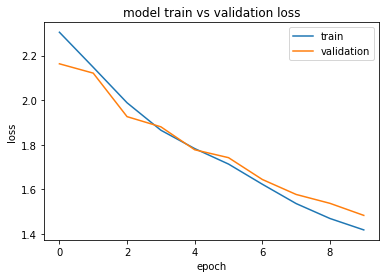

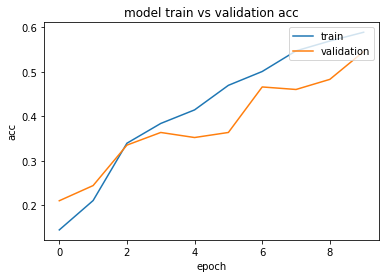

Acertos: 184 / 310
Confusion matrix, without normalization
[[27  1  1  0  2  0  0  1  0  0]
 [ 3 14  3  0  1  0  0  0  3  0]
 [ 2  2 29  0  1  0  0  0  0  0]
 [ 0  0  8 22  0  0  0  0  0  0]
 [ 3  0  3  0 14  2  0  6  0  2]
 [ 1  0  0  4  3 24  0  1  0  2]
 [ 1  0 11  0 12  0  0  3  1  0]
 [ 4  3 13  0  0  1  0 19  1  1]
 [ 2  1  7  1  0  1  0  3 10  3]
 [ 0  0  0  0  2  0  0  0  0 25]]
CPU times: user 45.7 s, sys: 5.79 s, total: 51.5 s
Wall time: 12.5 s


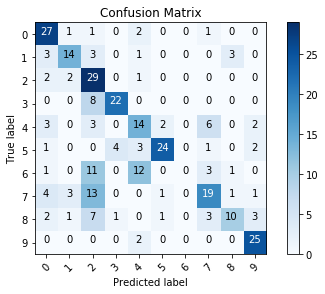

In [6]:
%%time
acertos, pred_1 = execute_model(model_1, X_train, Y_train, X_test, Y_test, 
                                validation_split, batch_size, cm_plot_labels, 
                                adam_lr, nb_epochs)
resultados.append({'modelo': 'model_1', 'acertos': acertos})

## Modelo 2
- Convolution2D filter 3x3 activation relu
- MaxPooling2D filter 3x3 
- Dropout 0.2
- Flatten
- Fully connected 128 activation relu
- Fully connected 10 activation softmax

In [7]:
y = x = Input(shape=(64,64,1))
y = Conv2D(3, kernel_size=(3, 3), activation='relu')(y)
y = MaxPooling2D(pool_size=(3, 3))(y)
y = Dropout(0.2)(y)
y = Flatten()(y)
y = Dense(128, activation='relu')(y)
y = Dense(10, activation='softmax')(y)
model_2 = Model(inputs=x, outputs=y)
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 3)         30        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 20, 3)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 20, 20, 3)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1200)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               153728    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total para

In [8]:
expand_train_X = np.expand_dims(X_train, axis=-1)
expand_test_X = np.expand_dims(X_test, axis=-1)

Train on 1576 samples, validate on 176 samples
Epoch 1/10
1576/1576 [==============================] - 1s 744us/step - loss: 2.3236 - acc: 0.1110 - val_loss: 2.2465 - val_acc: 0.2273
Epoch 2/10
1576/1576 [==============================] - 1s 623us/step - loss: 2.2331 - acc: 0.1929 - val_loss: 2.1339 - val_acc: 0.4261
Epoch 3/10
1576/1576 [==============================] - 1s 614us/step - loss: 2.0975 - acc: 0.2931 - val_loss: 2.0044 - val_acc: 0.4261
Epoch 4/10
1576/1576 [==============================] - 1s 620us/step - loss: 1.9544 - acc: 0.4245 - val_loss: 1.8530 - val_acc: 0.5284
Epoch 5/10
1576/1576 [==============================] - 1s 618us/step - loss: 1.8150 - acc: 0.4676 - val_loss: 1.7193 - val_acc: 0.5909
Epoch 6/10
1576/1576 [==============================] - 1s 609us/step - loss: 1.6748 - acc: 0.5298 - val_loss: 1.5999 - val_acc: 0.5966
Epoch 7/10
1576/1576 [==============================] - 1s 613us/step - loss: 1.5613 - acc: 0.5704 - val_loss: 1.4986 - val_acc: 0.6080
E

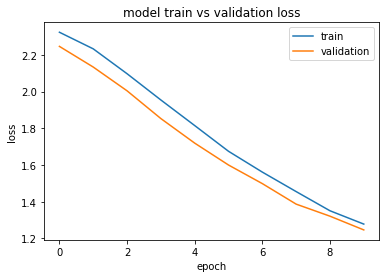

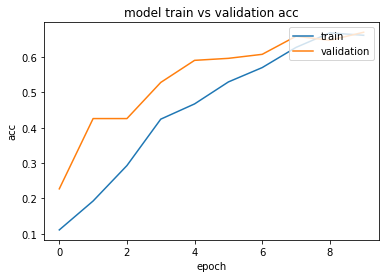

Acertos: 206 / 310
Confusion matrix, without normalization
[[28  0  0  0  0  0  1  2  1  0]
 [ 4 17  0  0  0  0  0  3  0  0]
 [ 1  2 24  1  0  0  3  3  0  0]
 [ 0  1  2 27  0  0  0  0  0  0]
 [ 2  0  1  0  6  3  6 10  1  1]
 [ 0  0  0  5  2 27  0  1  0  0]
 [ 0  1  4  0  3  0 16  4  0  0]
 [ 2  2  1  0  0  0  3 33  1  0]
 [ 0  1  0  0  2  1  2 10 12  0]
 [ 0  0  0  1  1  7  0  2  0 16]]
CPU times: user 34.4 s, sys: 3.6 s, total: 38 s
Wall time: 10.6 s


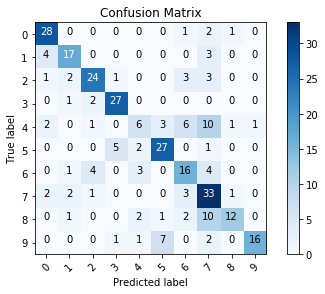

In [9]:
%%time
acertos, pred_2 = execute_model(model_2, expand_train_X, Y_train, expand_test_X, Y_test, 
                                validation_split, batch_size, cm_plot_labels, 
                                adam_lr, nb_epochs)
resultados.append({'modelo': 'model_2', 'acertos': acertos})

## Modelo 3 
- Convolution2D filter 5x5 activation relu
- MaxPooling2D filter 4x4
- Dropout 0.2
- Flatten
- Fully connected 128 activation relu
- Fully connected 10 activation softmax

In [10]:
y = x = Input(shape=(64,64,1))
y = Conv2D(3, kernel_size=(5, 5), activation='relu')(y)
y = MaxPooling2D(pool_size=(4, 4))(y)
y = Dropout(0.2)(y)
y = Flatten()(y)
y = Dense(128, activation='relu')(y)
y = Dense(10, activation='softmax')(y)
model_3 = Model(inputs=x, outputs=y)
model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 3)         78        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 3)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 15, 15, 3)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 675)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               86528     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total para

Train on 1576 samples, validate on 176 samples
Epoch 1/10
1576/1576 [==============================] - 2s 1ms/step - loss: 2.2828 - acc: 0.1472 - val_loss: 2.2189 - val_acc: 0.2784
Epoch 2/10
1576/1576 [==============================] - 1s 901us/step - loss: 2.1664 - acc: 0.3293 - val_loss: 2.0731 - val_acc: 0.4659
Epoch 3/10
1576/1576 [==============================] - 1s 900us/step - loss: 2.0129 - acc: 0.4975 - val_loss: 1.9036 - val_acc: 0.5795
Epoch 4/10
1576/1576 [==============================] - 1s 896us/step - loss: 1.8389 - acc: 0.5654 - val_loss: 1.7246 - val_acc: 0.6477
Epoch 5/10
1576/1576 [==============================] - 1s 901us/step - loss: 1.6728 - acc: 0.6022 - val_loss: 1.5654 - val_acc: 0.7102
Epoch 6/10
1576/1576 [==============================] - 1s 905us/step - loss: 1.5227 - acc: 0.6307 - val_loss: 1.4192 - val_acc: 0.6989
Epoch 7/10
1576/1576 [==============================] - 1s 902us/step - loss: 1.3714 - acc: 0.6827 - val_loss: 1.2927 - val_acc: 0.6932
Epo

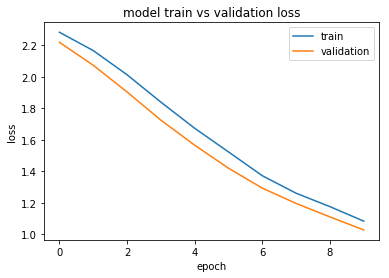

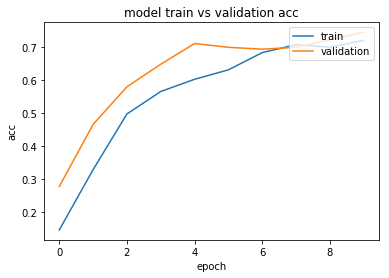

Acertos: 225 / 310
Confusion matrix, without normalization
[[29  2  0  0  0  0  0  0  1  0]
 [ 3 18  1  0  0  0  0  0  2  0]
 [ 0  2 27  0  0  0  4  1  0  0]
 [ 0  0  3 27  0  0  0  0  0  0]
 [ 2  0  1  0 19  1  0  3  3  1]
 [ 0  0  0  4  2 28  0  0  0  1]
 [ 1  0  6  0  4  0 15  1  1  0]
 [ 3  0  4  0  3  0  0 24  7  1]
 [ 0  1  2  0  3  0  0  2 16  4]
 [ 0  0  0  0  1  2  1  0  1 22]]
CPU times: user 51.8 s, sys: 4.22 s, total: 56 s
Wall time: 15.2 s


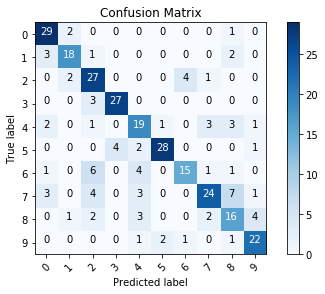

In [11]:
%%time
acertos, pred_3 = execute_model(model_3, expand_train_X, Y_train, expand_test_X, Y_test,
                                validation_split, batch_size, cm_plot_labels, 
                                adam_lr, nb_epochs)
resultados.append({'modelo': 'model_3', 'acertos': acertos})

## Modelo 4 - MobileNet (com freeze em todas as camadas)

In [ ]:
Y_train.shape

## Modelo 5 - VGG16 (com freeze em todas as camadas)